In [6]:
import yaml

with open('config.yml', 'r') as file:
    config = yaml.safe_load(file)

ParserError: while parsing a block mapping
  in "config.yml", line 1, column 1
expected <block end>, but found '<block mapping start>'
  in "config.yml", line 7, column 3

/home/bertie/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


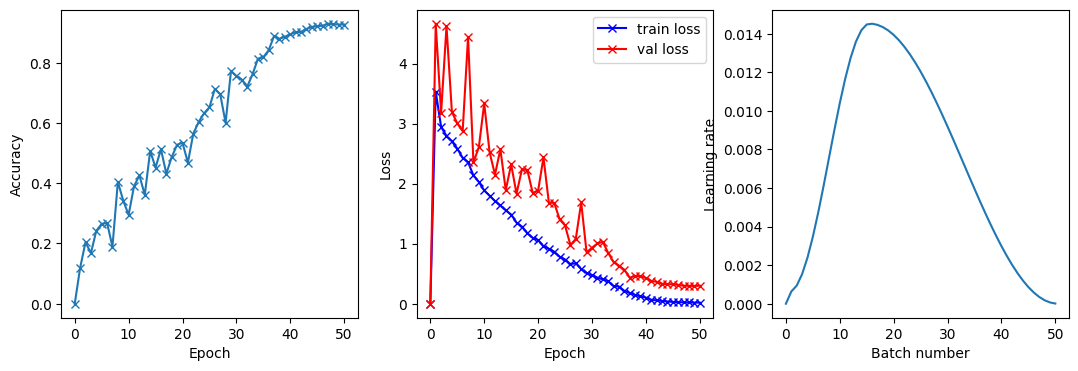

In [1]:
import processing
import pandas as pd

history = pd.read_csv('./output/resnet_20230219_013837.csv')
processing.plot_history(history)

In [1]:
import datasets.cub as cub
import datasets.flowers as flowers
from datasets.transforms import train_transform, test_transform
from torch.utils.data import DataLoader

datasets = flowers.get_datasets()

train = DataLoader(datasets['train'], batch_size=64, shuffle=True)
unknown = DataLoader(datasets['test_unknown'], batch_size=64)
val = DataLoader(datasets['val'], batch_size=64)
known = DataLoader(datasets['test_known'], batch_size=64)

/home/bertie/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
len(datasets['test_unknown'])

793

In [3]:
class_dict = dict()
for X,y in datasets['test_known']:
    if y in class_dict:
        class_dict[y] += 1
    else:
        class_dict[y] = 1

KeyboardInterrupt: 

(array([12., 34., 19.,  8.,  6.,  4.,  4.,  2.,  0.,  2.]),
 array([ 1. ,  3.7,  6.4,  9.1, 11.8, 14.5, 17.2, 19.9, 22.6, 25.3, 28. ]),
 <BarContainer object of 10 artists>)

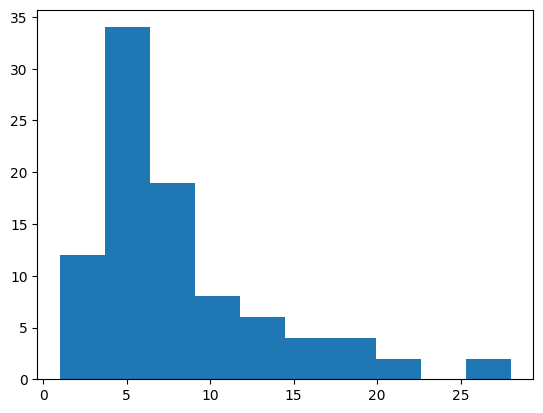

In [3]:
import matplotlib.pyplot as plt
class_dict
plt.hist(class_dict.values())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


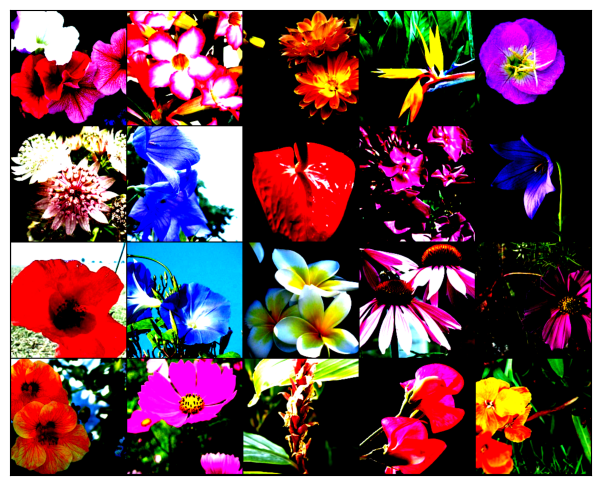

In [3]:
from functions import show_batch
show_batch(train)

In [8]:
from datasets.get_stats import get_stats

mean, std = get_stats(train)

100%|██████████| 93/93 [00:23<00:00,  3.88it/s]


In [9]:
print(mean, std)

tensor([-0.1413, -0.4552, -0.6478]) tensor([1.4815, 1.2438, 1.3712])
